In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Read Data

In [2]:
df = pd.read_csv('./data/cardiovascular.csv',';')

D:\python\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Plot Targent data division

D:\python\anaconda\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


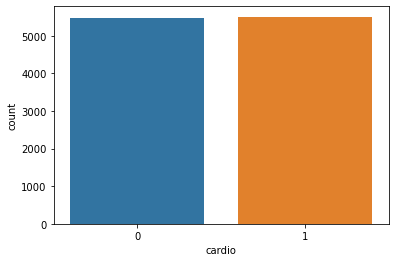

In [4]:
sns.countplot(df['cardio'])
plt.show()

In [5]:
patients_count=df['cardio'].value_counts(normalize=True)

In [6]:
patients_count

1    0.501
0    0.499
Name: cardio, dtype: float64

# Preprocess the data

In [7]:
X = df.drop(['id','cardio'], axis=1)
y = df.cardio 
X = preprocessing.scale(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

# Decision Tree

In [56]:
#Initialize the decision tree with default parameters
clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None, min_samples_split=2,
                                     max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.6156363636363636
f1 score : 0.6121100917431191
f1 score Micro: 0.6156363636363636
f1 score Macro: 0.6156045954211091
f1 score Weighted: 0.6156350929077534
Precision Score: 0.6123348017621145
average_precision_score: 0.5670424512349522
balanced_accuracy_score: 0.6156039124434469
confusion_matrix: [[859 528]
 [529 834]]
recall score: 0.6118855465884079


Text(0.5, 1.0, 'ROC curve: ')

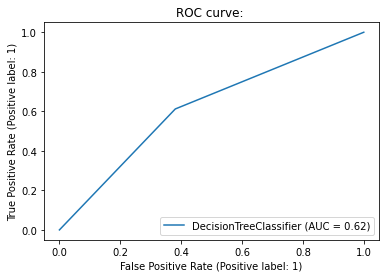

In [57]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
print("f1 score :",metrics.f1_score(y_test, y_pred))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred))
print("recall score:",metrics.recall_score(y_test, y_pred))
rocCurve = metrics.plot_roc_curve(clf, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

In [58]:
print(clf.tree_.max_depth)

47


In [59]:
tree_parameters = {'max_depth' : np.arange(1,47)}
clf = GridSearchCV(clf, tree_parameters, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 3}

In [71]:
clf = tree.DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Print Accuracy, F1 scores, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7105454545454546
f1 score : 0.6885758998435054
f1 score Micro: 0.7105454545454546
f1 score Macro: 0.7090977325304484
f1 score Weighted: 0.7092768321611708
Precision Score: 0.7376362112321878
average_precision_score: 0.6518798455764409
balanced_accuracy_score: 0.7099838612501262
recall score: 0.6456346294937637
confusion_matrix: [[1074  313]
 [ 483  880]]


Text(0.5, 1.0, 'ROC curve: ')

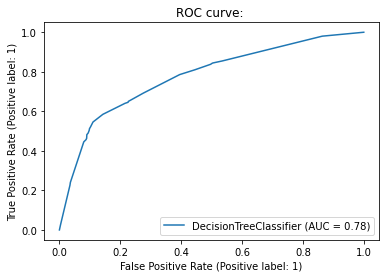

In [72]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
print("f1 score :",metrics.f1_score(y_test, y_pred))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred))
print("recall score:",metrics.recall_score(y_test, y_pred))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred))
rocCurve = metrics.plot_roc_curve(clf, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Decision Tree Learning Curve

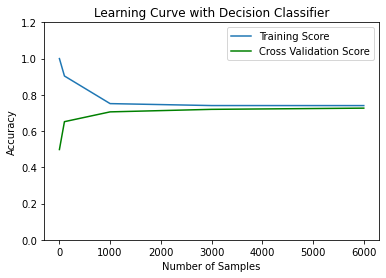

In [73]:
#Decided size as per the sample size, above 6000 is erroring out
parameter_range = [1, 100,1000,3000,6000]

dt_train_sizes, dt_train_scores, dt_valid_scores,dt_fit_times,dt_score_times = learning_curve(clf, X_train,y_train,train_sizes =parameter_range, cv = 5, scoring = "accuracy", n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(dt_train_scores, axis = 1)

# Calculating mean deviation of test score
mean_test_score = np.mean(dt_valid_scores, axis = 1)
 
plt.plot(dt_train_sizes,mean_train_score,label='Training Score')
plt.plot(dt_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with Decision Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Learning curve with F1 Score

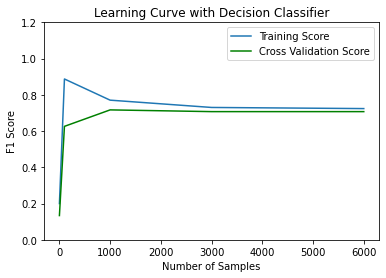

In [74]:
#Decided size as per the sample size, above 6000 is erroring out
parameter_range = [1, 100,1000,3000,6000]

dt_train_sizes, dt_train_scores, dt_valid_scores,dt_fit_times,dt_score_times = learning_curve(clf, X_train,y_train,train_sizes =parameter_range, cv = 5, scoring = "f1", n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(dt_train_scores, axis = 1)

# Calculating mean deviation of test score
mean_test_score = np.mean(dt_valid_scores, axis = 1)
 
plt.plot(dt_train_sizes,mean_train_score,label='Training Score')
plt.plot(dt_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with Decision Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Decision Tree Validation Curve

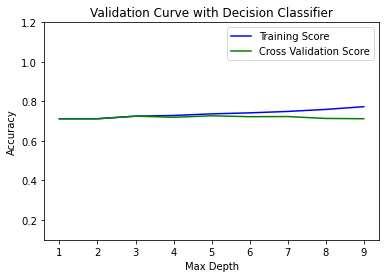

In [75]:
depth = np.arange(1,10)
 
train_score, test_score = validation_curve(clf, X, y,
                                       param_name = "max_depth",
                                       param_range = depth,
                                        cv = 5, scoring = "accuracy", n_jobs=5)

# Calculating mean deviation of train score
mean_train_score = np.mean(train_score, axis = 1)
 
# Calculating mean deviation of test score    
mean_test_score = np.mean(test_score, axis = 1)
 
plt.plot(depth, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(depth, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.1, 1.2)
#plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Validation curve with F1 Score

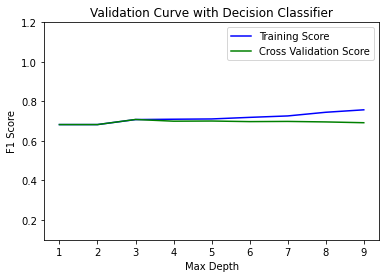

In [76]:
depth = np.arange(1,10)
 
train_score, test_score = validation_curve(clf, X, y,
                                       param_name = "max_depth",
                                       param_range = depth,
                                        cv = 5, scoring = "f1", n_jobs=5)

# Calculating mean deviation of train score
mean_train_score = np.mean(train_score, axis = 1)
 
# Calculating mean deviation of test score    
mean_test_score = np.mean(test_score, axis = 1)
 
plt.plot(depth, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(depth, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Classifier")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.1, 1.2)
#plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# Neural Network

In [18]:
#Initialize the Neural Network with default parameters and two hidden layers
clf_nn = MLPClassifier(hidden_layer_sizes=(8, 4))
clf_nn.fit(X_train, y_train)
y_pred_nn = clf_nn.predict(X_test)
clf_nn.get_params().keys()

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7218181818181818
f1 score : 0.7045191193511008
f1 score Micro: 0.7218181818181818
f1 score Macro: 0.7208614147081853
f1 score Weighted: 0.7210040383767562
Precision Score: 0.7438825448613376
average_precision_score: 0.6617409251016434
balanced_accuracy_score: 0.7213621824287046
recall score: 0.669112252384446
confusion_matrix: [[1073  314]
 [ 451  912]]


Text(0.5, 1.0, 'ROC curve: ')

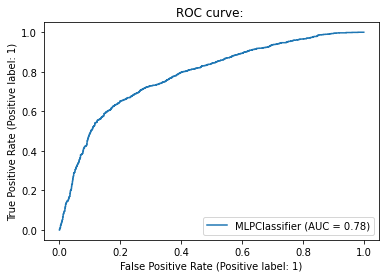

In [20]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_nn))
print("f1 score :",metrics.f1_score(y_test, y_pred_nn))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_nn,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_nn,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_nn,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_nn))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_nn))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_nn))
print("recall score:",metrics.recall_score(y_test, y_pred_nn))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_nn))
rocCurve = metrics.plot_roc_curve(clf_nn, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

In [21]:
activation_funcs = ['sigmoid', 'relu', 'tanh'] 
max_iterations=[10,50,100,200,500,1000]
param_grid = dict( activation = activation_funcs,  max_iter=max_iterations)
clf_nn_tuned = GridSearchCV(clf_nn, param_grid = param_grid,scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_nn_tuned.fit(X_train, y_train)
clf_nn_tuned.best_params_

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.68271004 0.72356984 0.72235875 0.72284301 0.72223548 0.72126637
 0.70453285 0.72514619 0.72320753 0.72381271 0.71253741 0.70756741]
  category=UserWarning
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.68568119 0.7373303  0.7396946  0.75027276 0.75506193 0.75306159
 0.70641412 0.73205633 0.73839128 0.74563551 0.76206372 0.76791367]
  category=UserWarning
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'tanh', 'max_iter': 50}

In [22]:
#Apply the best hyper tune parameters from the above tuning
clf_nn_tuned = MLPClassifier(activation='relu', max_iter=100,hidden_layer_sizes=(32, 8))
clf_nn_tuned.fit(X_train, y_train)
y_pred_nn_tuned = clf_nn_tuned.predict(X_test)

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score: 0.7232727272727273
f1 score : 0.7067437379576107
f1 score Micro: 0.7232727272727273
f1 score Macro: 0.7223908018531598
f1 score Weighted: 0.7225273580471573
Precision Score: 0.7443181818181818
average_precision_score: 0.6629446741812846
balanced_accuracy_score: 0.7228358814502764
recall score: 0.6727806309611152
confusion_matrix: [[1072  315]
 [ 446  917]]


Text(0.5, 1.0, 'ROC curve: ')

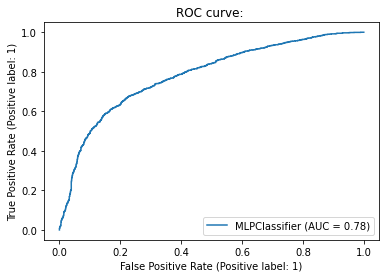

In [23]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_nn_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_nn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_nn_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_nn_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_nn_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_nn_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_nn_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_nn_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_nn_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_nn_tuned))
rocCurve = metrics.plot_roc_curve(clf_nn_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Neural Network Learning Curve

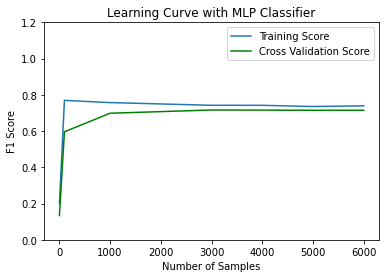

In [25]:
parameter_range = [1, 100,1000,3000,4000,5000,6000]
nn_train_sizes, nn_train_scores, nn_valid_scores,nn_fit_times,nn_score_times= learning_curve(clf_nn_tuned, X_train, y_train, train_sizes =parameter_range,
                                                                  cv=5,scoring='f1',n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(nn_train_scores, axis = 1)

# Calculating mean deviation of testing score
mean_test_score = np.mean(nn_valid_scores, axis = 1)

plt.plot(nn_train_sizes,mean_train_score,label='Training Score')
plt.plot(nn_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with MLP Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Neural Network Validation Curve

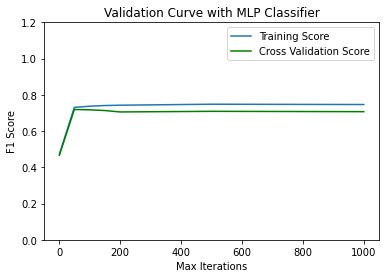

In [27]:
maxIterParam = [1,50,100,150,200,500,1000]
#hidden_layer_sizes=(30,30,30)
nn_train_scores, nn_test_scores = validation_curve(clf_nn_tuned, X_train, y_train, param_name="max_iter", 
                                             param_range=maxIterParam, cv=5, scoring='f1', n_jobs=4)
# Calculating mean deviation of train score
mean_train_score = np.mean(nn_train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(nn_test_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(maxIterParam,mean_train_score,label='Training Score')
plt.plot(maxIterParam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with MLP Classifier")
plt.xlabel("Max Iterations")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

### Boosting

In [28]:
d_clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
clf_adaboost = AdaBoostClassifier(base_estimator=d_clf)
clf_adaboost.fit(X_train, y_train)
y_pred_adaboost = clf_adaboost.predict(X_test)
clf_adaboost.get_params().keys()

dict_keys(['algorithm', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

In [ ]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_adaboost))
print("f1 score :",metrics.f1_score(y_test, y_pred_adaboost))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_adaboost,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_adaboost,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_adaboost,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_adaboost))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_adaboost))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_adaboost))
print("recall score:",metrics.recall_score(y_test, y_pred_adaboost))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_adaboost))
rocCurve = metrics.plot_roc_curve(clf_adaboost, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Tune Adaboost Classifier

In [ ]:
tuningParams = {'learning_rate' :  np.arange(0.1,2.0), 'n_estimators': [10,20,30,40,50,60,70,80,90,100,200,500]}
clf_nn_ad = GridSearchCV(clf_adaboost, tuningParams, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs',  return_train_score=True)
clf_nn_ad.fit(X_train, y_train)
clf_nn_ad.best_params_

In [ ]:
#Apply the best hyper tune parameters from the above tuning
clf_adaboost_tuned = AdaBoostClassifier(base_estimator=d_clf, learning_rate= 1.1, n_estimators=70)
clf_adaboost_tuned.fit(X_train, y_train)
y_pred_boost_tuned = clf_adaboost_tuned.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

In [ ]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_boost_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_boost_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_boost_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_boost_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_boost_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_boost_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_boost_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_boost_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_boost_tuned))
print("f1 score:",metrics.f1_score(y_test, y_pred_boost_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_boost_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_boost_tuned))
rocCurve = metrics.plot_roc_curve(clf_adaboost_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Adaboost Learning Curve

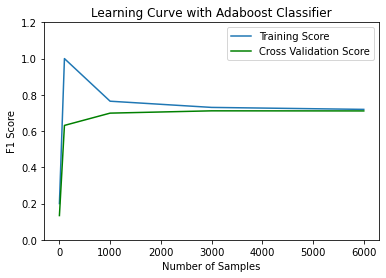

In [34]:
parameter_range = [1, 100,1000,3000,6000]
adaboost_train_sizes, adaboost_train_scores, adaboost_valid_scores,adaboost_fit_times,adaboost_score_times = learning_curve(clf_adaboost_tuned, X_train, y_train, train_sizes=parameter_range,cv=5, scoring='f1',n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(adaboost_train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(adaboost_valid_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(adaboost_train_sizes,mean_train_score,label='Training Score')
plt.plot(adaboost_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with Adaboost Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Adaboost Validation Curve

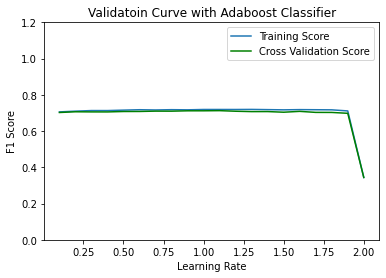

In [35]:
learningRate =  np.linspace(0.1,2.0,20)
adabst_train_scores, adabst_valid_scores = validation_curve(clf_adaboost_tuned, X_train, y_train, param_name="learning_rate", param_range=learningRate, scoring='f1', cv=5)

# Calculating mean deviation of train score
mean_train_score = np.mean(adabst_train_scores, axis = 1)

 
# Calculating mean  deviation of testing score
mean_test_score = np.mean(adabst_valid_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(learningRate,mean_train_score,label='Training Score')
plt.plot(learningRate,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validatoin Curve with Adaboost Classifier")
plt.xlabel("Learning Rate")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

# SVM

In [11]:
#default kernal 'rbf'
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
clf_svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7127272727272728
f1 score : 0.6937984496124032
f1 score Micro: 0.7127272727272728
f1 score Macro: 0.7116252522034618
f1 score Weighted: 0.7117808315715293
Precision Score: 0.7354149548069022
average_precision_score: 0.6530845214482727
balanced_accuracy_score: 0.7122420167142648
recall score: 0.6566397652237711
confusion_matrix: [[1065  322]
 [ 468  895]]
ROC AUC Curve: 0.7122420167142649


Text(0.5, 1.0, 'ROC curve: ')

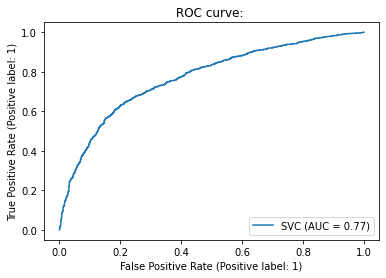

In [12]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_svm))
print("f1 score :",metrics.f1_score(y_test, y_pred_svm))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_svm,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_svm,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_svm,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_svm))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_svm))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_svm))
print("recall score:",metrics.recall_score(y_test, y_pred_svm))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_svm))
rocCurve = metrics.plot_roc_curve(clf_svm, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Tune the SVC Classifer

In [18]:
#tuningParams = {'C' :  [ 1, 10,25,50, 100],'max_iter' :  [10,50,100,200,500,1000], 'degree':[1,2,3,4,5,6]}
tuningParams = {'C' :  [ 1, 10,25,50, 100]}
#tuningParams = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C' :  [ 1, 10,25,50, 100]}
clf_svc_tuned = GridSearchCV(clf_svm, tuningParams, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_svc_tuned.fit(X_train, y_train)
clf_svc_tuned.best_params_

{'C': 10, 'kernel': 'linear'}

In [16]:
#Apply the best hyper tune parameters from the above tuning
#clf_svc_tuned = svm.SVC(C= 1, degree=1,max_iter=1000)
clf_svc_tuned = svm.SVC(kernel='linear',C=10)
clf_svc_tuned.fit(X_train, y_train)
y_pred_svm_tuned = clf_svc_tuned.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7163636363636363
f1 score : 0.6768848384424193
f1 score Micro: 0.7163636363636363
f1 score Macro: 0.7120652319237373
f1 score Weighted: 0.7123722608123014
Precision Score: 0.7773549000951475
average_precision_score: 0.6645021334726267
balanced_accuracy_score: 0.7153518072913718
recall score: 0.5994130594277329
confusion_matrix: [[1153  234]
 [ 546  817]]
ROC AUC Curve: 0.7153518072913719


Text(0.5, 1.0, 'ROC curve: ')

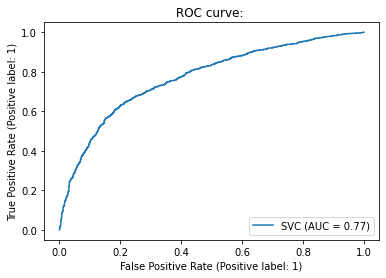

In [17]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_svm_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_svm_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_svm_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_svm_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_svm_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_svm_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_svm_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_svm_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_svm_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_svm_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_svm_tuned))
rocCurve = metrics.plot_roc_curve(clf_svm, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

In [41]:
y_test.unique()

array([1, 0], dtype=int64)

#### SVM Learning Curve

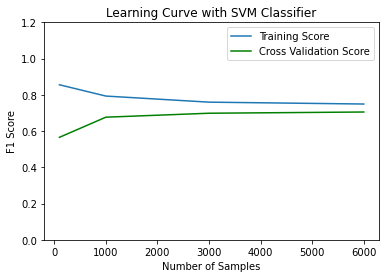

In [42]:
parameter_range = [1, 100,1000,3000,6000]

svm_train_sizes, svm_train_scores, svm_valid_scores,svm_fit_times,svm_score_times = learning_curve(clf_svc_tuned, X_train, y_train, train_sizes=parameter_range,
                                                                     cv=5, scoring='f1',n_jobs=5,return_times=True)
# Calculating mean deviation of train score
mean_train_score = np.mean(svm_train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(svm_valid_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(svm_train_sizes,mean_train_score,label='Training Score')
plt.plot(svm_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with SVM Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

#### SVM Validation Curve

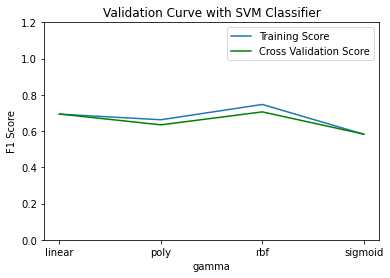

In [78]:
kernelparam = ['linear', 'poly', 'rbf', 'sigmoid']
#kernelparam = [1e-1, 1, 1e1]
train_scores, test_scores = validation_curve(clf_svc_tuned, X_train, y_train, param_name="kernel", param_range=kernelparam, scoring='f1', cv=5)
# Calculating mean deviation of train score
mean_train_score = np.mean(train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(test_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(kernelparam,mean_train_score,label='Training Score')
plt.plot(kernelparam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with SVM Classifier")
plt.xlabel("Kernel")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

# k-nearest neighbors 

In [44]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)
y_pred_knn = clf_knn.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.6305454545454545
f1 score : 0.6197604790419161
f1 score Micro: 0.6305454545454545
f1 score Macro: 0.6302479905817784
f1 score Weighted: 0.6303395179552173
Precision Score: 0.6325439266615738
average_precision_score: 0.5788054481447085
balanced_accuracy_score: 0.630345927835297
confusion_matrix: [[906 481]
 [535 828]]
f1 score: 0.6197604790419161
recall score: 0.607483492296405
ROC AUC Curve: 0.630345927835297


Text(0.5, 1.0, 'ROC curve: ')

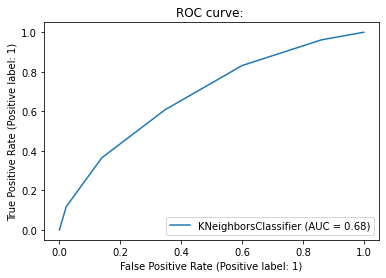

In [45]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_knn))
print("f1 score :",metrics.f1_score(y_test, y_pred_knn))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_knn,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_knn,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_knn,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_knn))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_knn))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_knn))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_knn))
print("f1 score:",metrics.f1_score(y_test, y_pred_knn))
print("recall score:",metrics.recall_score(y_test, y_pred_knn))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_knn))
rocCurve = metrics.plot_roc_curve(clf_knn, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Tune the KNN Classifer

In [46]:
tuningParams = {'n_neighbors': np.arange(1, 101)}
clf_knn_tuned = GridSearchCV(clf_knn, tuningParams, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_knn_tuned.fit(X_train, y_train)
clf_knn_tuned.best_params_

{'n_neighbors': 55}

In [47]:
#Apply the best hyper tune parameters from the above tuning
clf_knn_tuned = KNeighborsClassifier(n_neighbors=55)
clf_knn_tuned.fit(X_train,y_train)
y_pred_knn_tuned = clf_knn.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.6305454545454545
f1 score : 0.6197604790419161
f1 score Micro: 0.6305454545454545
f1 score Macro: 0.6302479905817784
f1 score Weighted: 0.6303395179552173
Precision Score: 0.6325439266615738
average_precision_score: 0.5788054481447085
balanced_accuracy_score: 0.630345927835297
confusion_matrix: [[906 481]
 [535 828]]
f1 score: 0.6197604790419161
recall score: 0.607483492296405
ROC AUC Curve: 0.630345927835297


Text(0.5, 1.0, 'ROC curve: ')

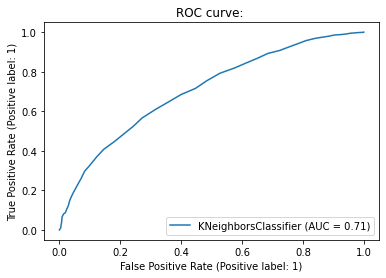

In [48]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_knn_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_knn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_knn_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_knn_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_knn_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_knn_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_knn_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_knn_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_knn_tuned))
print("f1 score:",metrics.f1_score(y_test, y_pred_knn_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_knn_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_knn_tuned))
rocCurve = metrics.plot_roc_curve(clf_knn_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### KNN Learning Curve

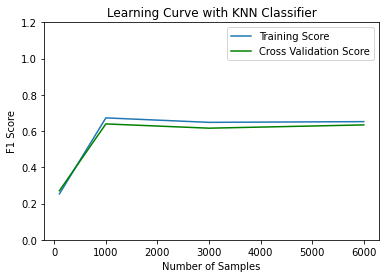

In [49]:
parameter_range = [100,1000,3000,6000]
knn_train_sizes, knn_train_scores, knn_valid_scores,knn_fit_times,knn_score_times = learning_curve(clf_knn_tuned, X_train, y_train, train_sizes=parameter_range, cv=5, scoring='f1',n_jobs=5,return_times=True)

# Mean deviation of train score
mean_train_score = np.mean(knn_train_scores, axis = 1)
 
# Mean deviation of testing score
mean_test_score = np.mean(knn_valid_scores, axis = 1)
 
# Plot mean F1 scores for training and testing scores
plt.plot(knn_train_sizes,mean_train_score,label='Training Score')
plt.plot(knn_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with KNN Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

#### KNN Validation Curve

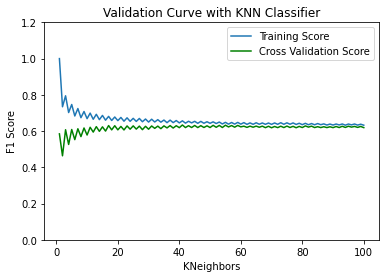

In [50]:
neighborsParam = np.arange(1, 101)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name="n_neighbors", 
                                             param_range=neighborsParam, scoring='f1', cv=5)
mean_train_score = np.mean(train_scores, axis = 1)
 
# Calculating mean  deviation of testing score
mean_test_score = np.mean(test_scores, axis = 1)
 
# Plot mean F1 scores for training and testing scores
plt.plot(neighborsParam,mean_train_score,label='Training Score')
plt.plot(neighborsParam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("KNeighbors")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

#### Models score times comparison

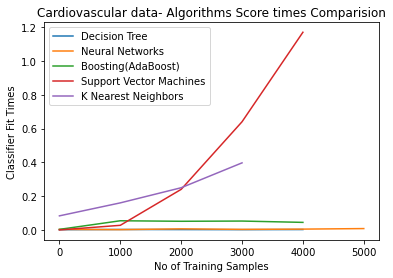

In [80]:
train_sizes = np.arange(start=0, stop=6000, step=1000)
data = pd.DataFrame({'DecisionTree':pd.Series(np.mean(dt_score_times, axis=1)), 'NeuralNetworks':pd.Series(np.mean(nn_score_times, axis=1)), 
                     'Boosting':pd.Series(np.mean(adaboost_score_times, axis=1)), 'SVM':pd.Series(np.mean(svm_score_times, axis=1)), 
                     'KNN':pd.Series(np.mean(knn_score_times, axis=1)), 'TrainingExamples':pd.Series(train_sizes) })
plt.plot('TrainingExamples','DecisionTree', data=data, label='Decision Tree')
plt.plot('TrainingExamples','NeuralNetworks', data=data, label='Neural Networks')
plt.plot('TrainingExamples','Boosting', data=data, label='Boosting(AdaBoost)')
plt.plot('TrainingExamples','SVM', data=data, label='Support Vector Machines')
plt.plot('TrainingExamples','KNN', data=data, label='K Nearest Neighbors')
plt.xlabel('No of Training Samples')
plt.ylabel('Classifier Fit Times')
plt.title('Cardiovascular data- Algorithms Score times Comparision')
plt.legend(loc="best")
plt.legend()

#### Models fit times comparison

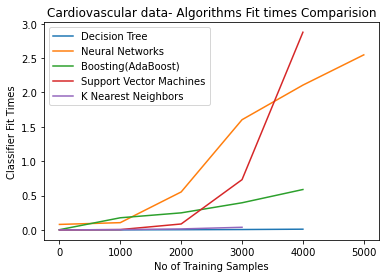

In [79]:
train_sizes = np.arange(start=0, stop=6000, step=1000)
data = pd.DataFrame({'DecisionTree':pd.Series(np.mean(dt_fit_times, axis=1)), 'NeuralNetworks':pd.Series(np.mean(nn_fit_times, axis=1)), 
                     'Boosting':pd.Series(np.mean(adaboost_fit_times, axis=1)), 'SVM':pd.Series(np.mean(svm_fit_times, axis=1)), 
                     'KNN':pd.Series(np.mean(knn_fit_times, axis=1)), 'TrainingExamples':pd.Series(train_sizes) })
plt.plot('TrainingExamples','DecisionTree', data=data, label='Decision Tree')
plt.plot('TrainingExamples','NeuralNetworks', data=data, label='Neural Networks')
plt.plot('TrainingExamples','Boosting', data=data, label='Boosting(AdaBoost)')
plt.plot('TrainingExamples','SVM', data=data, label='Support Vector Machines')
plt.plot('TrainingExamples','KNN', data=data, label='K Nearest Neighbors')
plt.xlabel('No of Training Samples')
plt.ylabel('Classifier Fit Times')
plt.title('Cardiovascular data- Algorithms Fit times Comparision')
plt.legend(loc="best")
plt.legend()